In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [175]:
df = pd.read_csv('results/N100-F1000-S100-R100-result-v11-exp.csv')
df.describe()

,correlation,load,v1,v2,disturbance,mean_ca,actual_load
count,31500.00000,31500.000000,2.435400e+04,2.435400e+04,31500.000000,31500.000000,3.150000e+04
mean,0.50000,0.800000,5.979097e+06,7.825382e+05,0.152940,0.264798,1.201364e+06
std,0.30277,0.070712,4.618513e+06,8.287573e+05,0.045257,0.140306,5.822237e+04
min,0.00000,0.700000,1.321913e+06,4.557819e+04,0.002173,0.036086,9.830723e+05
25%,0.25000,0.750000,3.307729e+06,3.239553e+05,0.130136,0.147866,1.172587e+06
50%,0.50000,0.800000,4.526501e+06,5.584337e+05,0.156623,0.253118,1.200004e+06
75%,0.75000,0.850000,6.952141e+06,9.374971e+05,0.185848,0.368328,1.231675e+06
max,1.00000,0.900000,5.932605e+07,1.216069e+07,0.229164,0.670939,1.434045e+06


In [176]:
df.corr()

,correlation,load,v1,v2,disturbance,mean_ca,actual_load
correlation,1.000000e+00,1.028937e-20,0.005687,0.475115,-6.763253e-01,9.496176e-01,-2.398211e-02
load,1.028937e-20,1.000000e+00,0.647137,0.460627,5.162676e-20,4.773779e-19,1.402658e-19
v1,5.686690e-03,6.471371e-01,1.000000,0.788516,-1.077914e-01,-2.030102e-02,4.219612e-01
v2,4.751154e-01,4.606267e-01,0.788516,1.000000,-4.131194e-01,4.777298e-01,3.258502e-01
disturbance,-6.763253e-01,5.162676e-20,-0.107791,-0.413119,1.000000e+00,-6.200349e-01,-7.155964e-02
mean_ca,9.496176e-01,4.773779e-19,-0.020301,0.477730,-6.200349e-01,1.000000e+00,-8.132379e-02
actual_load,-2.398211e-02,1.402658e-19,0.421961,0.325850,-7.155964e-02,-8.132379e-02,1.000000e+00


In [177]:
df = df.drop('v1', axis=1)

In [178]:
vals = df.drop(['disturbance', 'actual_load', 'mean_ca'], axis=1).groupby(['algorithm', 'correlation', 'load']).median()
vals = vals.unstack(0)
vals.reset_index(inplace=True)
vals.head()

correlation  load             v2                              
algorithm                               BF             RR           SALP
0                 0.0  0.70   79406.858587   95714.043137   52576.741051
1                 0.0  0.75  101925.980512  140714.690888   67876.436676
2                 0.0  0.80  135962.975447  222111.950514   90985.154157
3                 0.0  0.85  192091.697221            NaN  130702.800556
4                 0.0  0.90  305035.456653            NaN  215841.436223

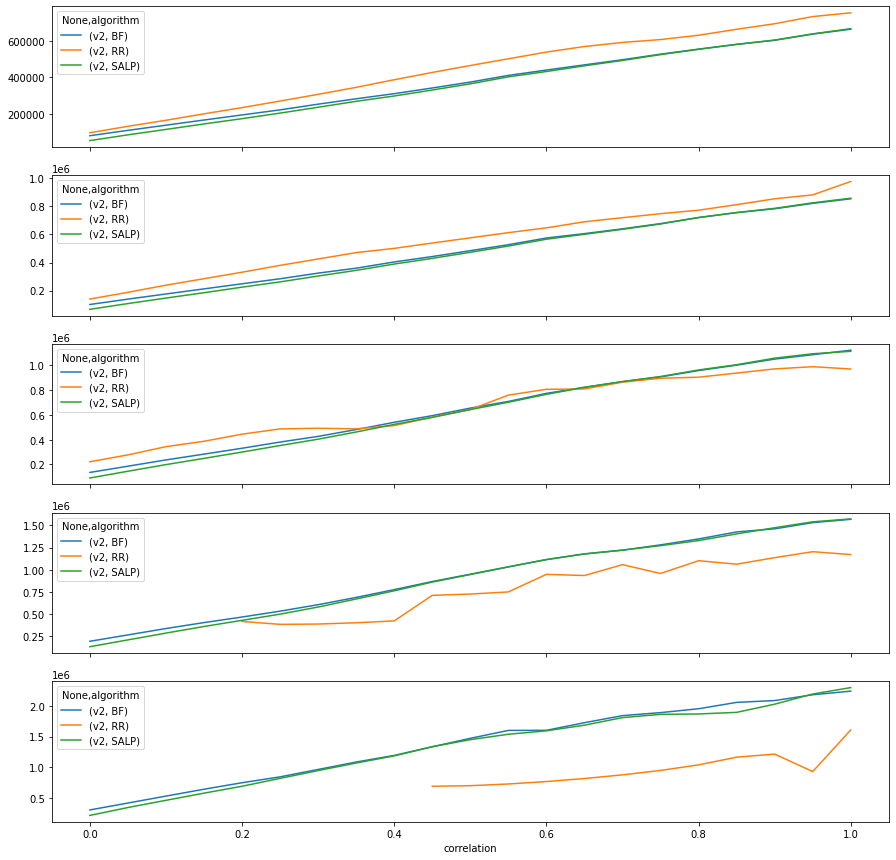

In [179]:
loads = vals['load'].unique()
fig, axes = plt.subplots(loads.size, 1, figsize=(15,15), sharex=True)
for i in range(loads.size):
    vals[vals['load']==loads[i]].drop('load', axis=1).plot(x='correlation', ax=axes[i], legend=True)
plt.show()

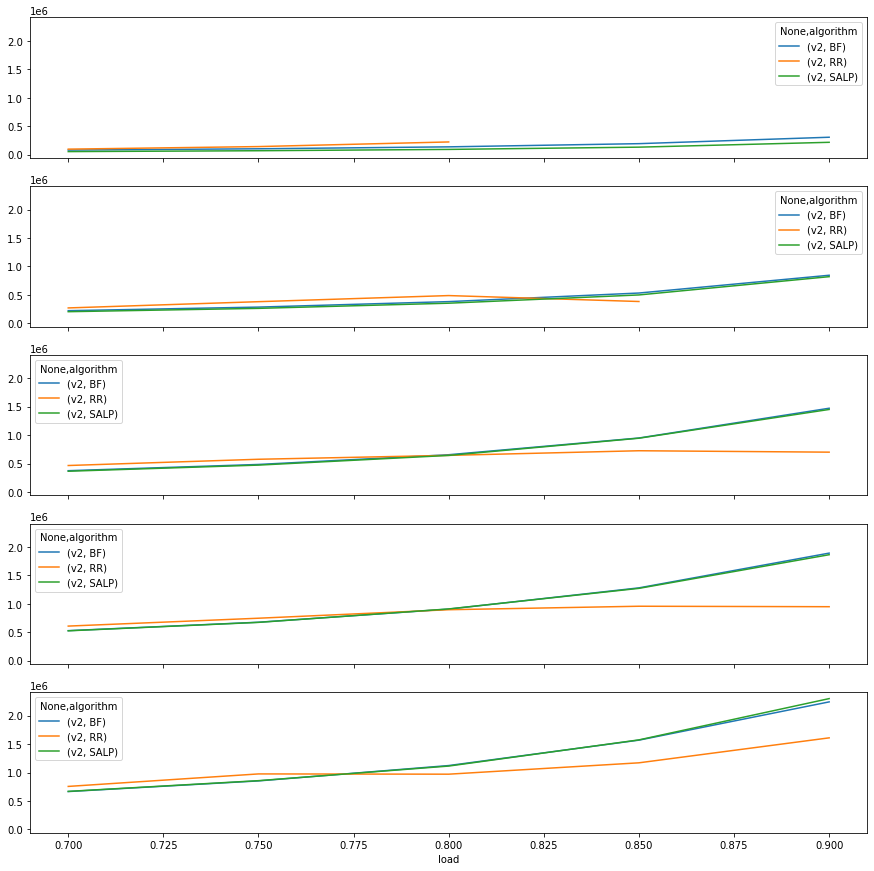

In [180]:
cors = np.array([0,.25,.5,.75,1])
fig, axes = plt.subplots(loads.size, 1, figsize=(15,15), sharex=True, sharey=True)
for i in range(cors.size):
    vals[vals['correlation']==cors[i]].drop('correlation', axis=1).plot(x='load', ax=axes[i], legend=True)
plt.show()

In [181]:
df.groupby(['algorithm', 'load']).count()

correlation    v2  disturbance  mean_ca  actual_load
algorithm load                                                      
BF        0.70         2100  2100         2100     2100         2100
          0.75         2100  2100         2100     2100         2100
          0.80         2100  2100         2100     2100         2100
          0.85         2100  2094         2100     2100         2100
          0.90         2100  1983         2100     2100         2100
RR        0.70         2100  1998         2100     2100         2100
          0.75         2100  1329         2100     2100         2100
          0.80         2100   315         2100     2100         2100
          0.85         2100    78         2100     2100         2100
          0.90         2100    18         2100     2100         2100
SALP      0.70         2100  2100         2100     2100         2100
          0.75         2100  2100         2100     2100         2100
          0.80         2100  2099         2100     2100         2100
          0.85         2100  2075         2100     2100         2100
          0.90         2100  1865         2100     2100         2100

In [182]:
dist = df.drop(['v2', 'actual_load', 'mean_ca', 'load'], axis=1)
dist = dist.drop_duplicates()
dist = dist.groupby(['algorithm', 'correlation']).mean()
dist = dist.unstack(0)
dist.reset_index(inplace=True)
dist.head()

correlation disturbance                    
algorithm                      BF        RR      SALP
0                0.00    0.186076  0.211412  0.156930
1                0.05    0.185545  0.211184  0.155267
2                0.10    0.184221  0.210562  0.153000
3                0.15    0.183077  0.209705  0.150806
4                0.20    0.181298  0.208649  0.148477

<AxesSubplot:xlabel='correlation'>

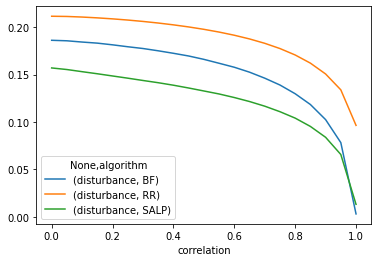

In [183]:
# loads = vals['load'].unique()
# fig, axes = plt.subplots(loads.size, 1, figsize=(15,15), sharex=True)
# for i in range(loads.size):
#     dist[dist['load']==loads[i]].drop('load', axis=1).plot(x='correlation', ax=axes[i], legend=True)
# plt.show()
dist.plot(x='correlation', legend=True)

In [184]:
acld = df.drop(['algorithm', 'v2', 'disturbance', 'mean_ca', 'load'], axis=1).groupby(['correlation']).mean()
acld = acld.drop_duplicates()
# acld = acld.unstack(0)
acld.reset_index(inplace=True)
acld.head()

,correlation,actual_load
0,0.00,1.199363e+06
1,0.05,1.198752e+06
2,0.10,1.199805e+06
3,0.15,1.200982e+06
4,0.20,1.202091e+06


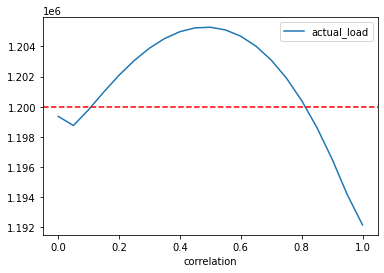

In [185]:
# est = 1.2 * 10**6
# loads = acld['load'].unique()
# fig, axes = plt.subplots(loads.size, 1, figsize=(15,15), sharex=True)
# for i in range(loads.size):
#     acld[acld['load']==loads[i]].drop('load', axis=1).plot(x='correlation', ax=axes[i], legend=True)
#     axes[i].axhline(est,color='red',ls='--')
# plt.show()
fig, ax = plt.subplots()
acld.plot(x='correlation', ax=ax, legend=True)
ax.axhline(est,color='red',ls='--')
plt.show()

In [186]:
# loads = acld['load'].unique()
# fig, axes = plt.subplots(loads.size, 2, figsize=(20,15), sharex=True)
# for i in range(loads.size):
#     acld[acld['load']==loads[i]].drop('load', axis=1).plot(x='correlation', ax=axes[i][0], legend=True)
#     axes[i][0].axhline(est,color='red',ls='--', label="estimated")
#     vals[vals['load']==loads[i]].drop('load', axis=1).plot(x='correlation', ax=axes[i][1], legend=True)

# plt.show()